# Lead Coversion Notebook

## Table of Contents

* [1. Project Overview](#chapter1)
  * [1.1 Introduction](#section_1_1)
      * [1.1.1 Problem Statement](#sub_section_1_1_1)
      * [1.1.2 Objectives](#sub_section_1_1_2)
* [2. Importing Packages](#chapter2)
* [3. Loading Data](#chapter3)
* [4. Data Cleaning](#chapter4)
* [5. Exploratory Data Analysis (EDA)](#chapter5)
* [6. Model training](#chapter7)
* [7. Model Performance Comparison and evaluation](#chapter8)
* [8. Fine-tune model parameters and hyperparameters](#chapter9)

# <font color=black>1. Project Overview</font> <a class="anchor" id="chapter1"></a>

This project aims to build a predictive machine learning model to assess the likelihood of customer lead conversion.
Leveraging a dataset with various lead attributes, the project will apply comprehensive data cleaning,
feature engineering, and machine learning techniques to identify the key factors that influence lead outcomes.
In addition to model development, the project will conduct exploratory data analysis (EDA)
to extract actionable insights from the data, which will be visualized through an interactive dashboard.
These insights are designed to help businesses optimize their marketing strategies and
improve overall lead conversion rates.

## 1.1.1 Problem Statement <a class="anchor" id="sub_section_1_1_1"></a>

Many businesses face the challenge of low lead conversion rates, which hampers the efficiency of their marketing efforts and results in wasted resources. Without a clear understanding of which leads are most likely to convert, companies often spend time and budget pursuing low-potential leads, leading to missed revenue opportunities. This project seeks to address this issue by developing a machine learning model that predicts the likelihood of lead conversion based on historical data. By identifying key factors that influence conversion, businesses can make data-driven decisions to optimize their marketing strategies, prioritize high-potential leads, and ultimately improve conversion rates while reducing costs.sed revenue.


## 1.1.2 Objectives <a class="anchor" id="sub_section_1_1_2"></a>

1. **Predict Lead Conversion Probability**  
   Develop a machine learning model to accurately predict the likelihood of customer lead conversion, enabling businesses to focus on high-potential leads.

2. **Optimize Marketing Strategies**  
   Provide actionable insights that help businesses refine and enhance their marketing strategies based on lead conversion predictions.

3. **Improve Resource Allocation**  
   Facilitate more efficient resource allocation by prioritizing leads with higher conversion potential, ultimately reducing costs associated with unconverted leads.

4. **Increase Revenue**  
   Support businesses in making data-driven decisions that can lead to improved lead conversion rates, contributing to increased revenue.


# <font color=black>2. Importing Packages</font> <a class="anchor" id="chapter2"></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
import mlflow
import mlflow.sklearn
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'mlflow'

# <font color=black> 3. Loading Data</font> <a class="anchor" id="chapter3"></a>

## Dataset Overview

The dataset contains customer lead information aimed at predicting lead conversion rates, with features spanning demographic, behavioral, and transactional data. Key attributes include:

- **LeadOutcome:** Final outcome of the lead (e.g., converted, not converted).
- **IsMarketingAllowed:** Permission for marketing communication.
- **Title:** Lead's title (e.g., Mr., Mrs., Dr.).
- **PostalProvince:** Lead's geographic location.
- **IdentificationType:** Type of ID provided (e.g., national ID).
- **Gender, Age, MaritalStatus:** Demographic details.
- **Vehicle Details:** Includes Annual Mileage, Licence Duration, Make, Model, and Previous Insurer.
- **Lead Age, MediaChannel, LeadSource:** Lead acquisition details.
- **Call Interaction Metrics:** Metrics such as total and answered calls, contact success rates.

We will load the dataset, inspect the first few rows, and display data information.

df = pd.read_csv('Leads_dataset.csv')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

In [ ]:
df.info()


# <font color=black> 4. Data cleaning</font> <a class="anchor" id="chapter4"></a>

Data cleaning is the process of fixing bad data in our dataset. This step is crucial in the data analysis process, it helps ensure that the data is accurate, consistent, and reliable. Clean data leads to more accurate analysis and modeling results, thus provides a solid foundation for decision-making. The dataset might contain missing values in key columns, particularly related to vehicle and previous insurance details,
which will be addressed during data cleaning.

In [ ]:
df.isna().sum()

In [ ]:

df['AnnualMileage'] = df['AnnualMileage'].replace({'<5000 km': '5000', '5000-10000 km': '7500', '>20000 km': '20000'})

# Convert the column to numeric
df['AnnualMileage'] = pd.to_numeric(df['AnnualMileage'], errors='coerce')

# Now, fill missing values with median
df['AnnualMileage'].fillna(df['AnnualMileage'].median(), inplace=True)

df['NewPriceVatExcl'] = df['NewPriceVatExcl'].replace({'<5000': '5000', '>10000': '10000'})
df['NewPriceVatExcl'] = pd.to_numeric(df['NewPriceVatExcl'], errors='coerce')
df['NewPriceVatExcl'].fillna(df['NewPriceVatExcl'].median(), inplace=True)

# Similarly, handle 'RetailPriceVatExcl'
df['RetailPriceVatExcl'] = df['RetailPriceVatExcl'].replace({'<5000': '5000', '>10000': '10000'})
df['RetailPriceVatExcl'] = pd.to_numeric(df['RetailPriceVatExcl'], errors='coerce')
df['RetailPriceVatExcl'].fillna(df['RetailPriceVatExcl'].median(), inplace=True)

# Final null check
print(df.isnull().sum())


LeadOutcome                                   0
IsMarketingAllowed                            0
Title                                         0
PostalProvince                                0
IdentificationType                            0
Gender                                        0
Age                                           0
MaritalStatus                                 0
AnnualMileage                                 0
LicenceDurationRange                          0
Make                                          0
Model                                         0
NewPriceVatExcl                               0
RetailPriceVatExcl                            0
TradePriceVatExcl                             0
PreviousInsurer                               0
PreviousInsurerPremium                        0
Lead Age (Calendar Days)                      0
Lead Age (Working Days)                       0
Lead Age (Working Hours)                      0
Lead Age (working Minutes)              

C:\Users\tevin\AppData\Local\Temp\ipykernel_15136\914844894.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AnnualMileage'].fillna(df['AnnualMileage'].median(), inplace=True)
C:\Users\tevin\AppData\Local\Temp\ipykernel_15136\914844894.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [ ]:
# Fill missing values in numerical columns with the median
df['LicenceDurationRange'].fillna(df['LicenceDurationRange'].mode()[0], inplace=True)
df['TradePriceVatExcl'].fillna(df['TradePriceVatExcl'].median(), inplace=True)
df['QuotedExcess'].fillna(df['QuotedExcess'].median(), inplace=True)
df['TotalQuotedPremium'].fillna(df['TotalQuotedPremium'].median(), inplace=True)

# Handle PreviousInsurerPremium with 0 if missing represents no premium
df['PreviousInsurerPremium'].fillna(0, inplace=True)

# For LeadCreateDt, use forward fill to propagate the last valid value forward
df['LeadCreateDt'] = pd.to_datetime(df['LeadCreateDt'], errors='coerce')  # Ensure the column is datetime
df['LeadCreateDt'].fillna(method='ffill', inplace=True)

# Final check for remaining nulls
print(df.isnull().sum())

LeadOutcome                                   0
IsMarketingAllowed                            0
Title                                         0
PostalProvince                                0
IdentificationType                            0
Gender                                        0
Age                                           0
MaritalStatus                                 0
AnnualMileage                                 0
LicenceDurationRange                          0
Make                                          0
Model                                         0
NewPriceVatExcl                               0
RetailPriceVatExcl                            0
TradePriceVatExcl                             0
PreviousInsurer                               0
PreviousInsurerPremium                        0
Lead Age (Calendar Days)                      0
Lead Age (Working Days)                       0
Lead Age (Working Hours)                      0
Lead Age (working Minutes)              

C:\Users\tevin\AppData\Local\Temp\ipykernel_15136\3265715456.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LicenceDurationRange'].fillna(df['LicenceDurationRange'].mode()[0], inplace=True)
C:\Users\tevin\AppData\Local\Temp\ipykernel_15136\3265715456.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

In [ ]:
# Fill categorical columns with mode or 'Unknown'
df['Title'].fillna('Unknown', inplace=True)
df['PostalProvince'].fillna(df['PostalProvince'].mode()[0], inplace=True)
df['IdentificationType'].fillna('Unknown', inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['MaritalStatus'].fillna(df['MaritalStatus'].mode()[0], inplace=True)
df['Make'].fillna('Unknown', inplace=True)
df['Model'].fillna('Unknown', inplace=True)

# Fill numerical columns with median
df['Age'].fillna(df['Age'].median(), inplace=True)
df['TradePriceVatExcl'].fillna(df['TradePriceVatExcl'].median(), inplace=True)

# Large amount of missing data, fill with 'Unknown'
df['PreviousInsurer'].fillna('Unknown', inplace=True)

# Check for remaining missing values
print(df.isnull().sum())

C:\Users\tevin\AppData\Local\Temp\ipykernel_15136\1772390566.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Title'].fillna('Unknown', inplace=True)
C:\Users\tevin\AppData\Local\Temp\ipykernel_15136\1772390566.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

LeadOutcome                                   0
IsMarketingAllowed                            0
Title                                         0
PostalProvince                                0
IdentificationType                            0
Gender                                        0
Age                                           0
MaritalStatus                                 0
AnnualMileage                                 0
LicenceDurationRange                          0
Make                                          0
Model                                         0
NewPriceVatExcl                               0
RetailPriceVatExcl                            0
TradePriceVatExcl                             0
PreviousInsurer                               0
PreviousInsurerPremium                        0
Lead Age (Calendar Days)                      0
Lead Age (Working Days)                       0
Lead Age (Working Hours)                      0
Lead Age (working Minutes)              

#Duplicates

The dataset contained significant duplicates, indicating potential redundancy. After identifying the duplicates, the approach was to remove them to ensure a cleaner analysis.

In [ ]:
# Check for duplicate rows
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 66539


### Map LeadOutcome to binary values

In [ ]:
df['LeadOutcome'] = df['LeadOutcome'].map({
    'SaleConcluded': 1,  # Lead was converted
    'Filed': 0  # Lead was not converted
})

### Drop rows with missing LeadOutcome

In [ ]:
df = df.dropna(subset=['LeadOutcome'])

# <font color=black>5. Exploratory Data Analysis</font> <a class="anchor" id="chapter5"></a>

Exploratory Data Analysis (EDA) is a crucial step in any data science project, providing a foundation for understanding the dataset.
It helps uncover patterns, identify anomalies, and test hypotheses. In this project, we
conduct EDA on a dataset consisting of news articles, which include various attributes such as headlines,
descriptions, full content, URLs, and categories.

The primary objective of this EDA is to gain insights into the structure and characteristics of the data.
This analysis will help identify potential issues or data quality problems that need to be
addressed before moving on to the subsequent modeling phase.

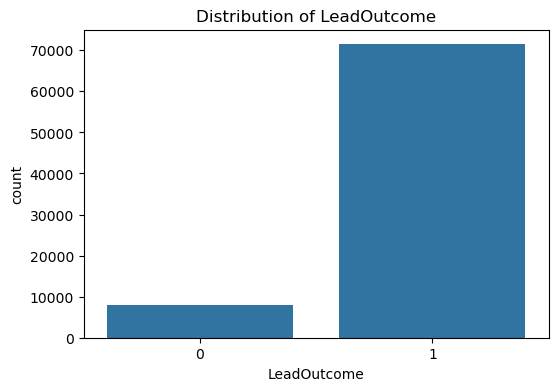

LeadOutcome
1    89.93014
0    10.06986
Name: proportion, dtype: float64


In [ ]:
# Visualize distribution of LeadOutcome
plt.figure(figsize=(6,4))
sns.countplot(x='LeadOutcome', data=df)
plt.title('Distribution of LeadOutcome')
plt.show()

# Percentage of each class in LeadOutcome
print(df['LeadOutcome'].value_counts(normalize=True) * 100)

Insights:

This indicates an imbalance in the LeadOutcome distribution, with '1's (representing successful lead outcomes) making up the majority of the data, around 90% (from the percentage calculation), while '0's (unsuccessful lead outcomes) account for about 10%.

The high number of positive outcome suggests that a large proportion of leads in the dataset convert successfully. However, the imbalance can impact model performance, as machine learning models may become biased towards predicting '1' more often, given the higher frequency.

### Features

The selected features for this analysis include a combination of demographic, vehicle, and lead-related attributes that are expected to influence lead conversion. Key demographic features like Title, Gender, Age, and MaritalStatus provide insights into the customer profile, while vehicle-related features such as AnnualMileage, Make, Model, NewPriceVatExcl, and RetailPriceVatExcl give details about the car being considered. Additionally, features like PreviousInsurer and PreviousInsurerPremium shed light on the customer's past insurance experience.

Lead-specific features like Lead Age (Calendar Days), TotalCalls, SuccessfulContacts, UnsuccessfulContacts, and HasBeenReworked? help in understanding the lead engagement process, while MediaChannel and LeadSource offer insights into how the lead was generated. These features collectively provide a comprehensive view of factors that could influence lead conversion.

In [ ]:
features_to_include = [
    'Title', 'Gender', 'Age', 'MaritalStatus',
    'AnnualMileage', 'LicenceDurationRange',
    'Make', 'Model', 'NewPriceVatExcl',
    'RetailPriceVatExcl', 'TradePriceVatExcl',
    'PreviousInsurer', 'PreviousInsurerPremium',
    'Lead Age (Calendar Days)', 'MediaChannel',
    'LeadSource', 'TotalCalls', 'SuccessfulContacts',
    'UnsuccessfulContacts', 'HasBeenReworked?'
]

### Create feature set (X) and target variable (y)

In [ ]:
X = df[features_to_include]
y = df['LeadOutcome']

### Handle categorical variables (One-Hot Encoding)

In [ ]:
X = pd.get_dummies(X, drop_first=True)

### Distribution of Target Variable (LeadOutcome)

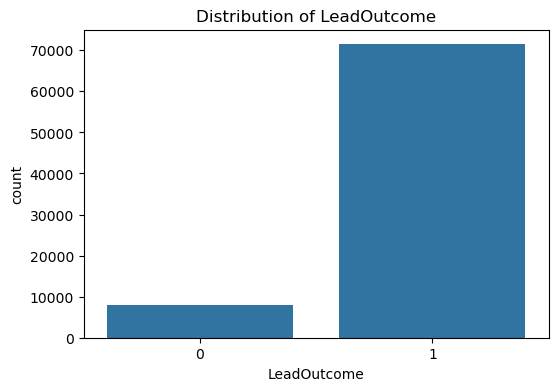

LeadOutcome
1    89.93014
0    10.06986
Name: proportion, dtype: float64


In [ ]:
# Visualize distribution of LeadOutcome
plt.figure(figsize=(6,4))
sns.countplot(x='LeadOutcome', data=df)
plt.title('Distribution of LeadOutcome')
plt.show()

# Percentage of each class in LeadOutcome
print(df['LeadOutcome'].value_counts(normalize=True) * 100)

Insights:

This indicates an imbalance in the LeadOutcome distribution, with '1's (representing successful lead outcomes) making up the majority of the data, around 90%, while '0's (unsuccessful lead outcomes) account for about 10%.

### Corelation Matrix

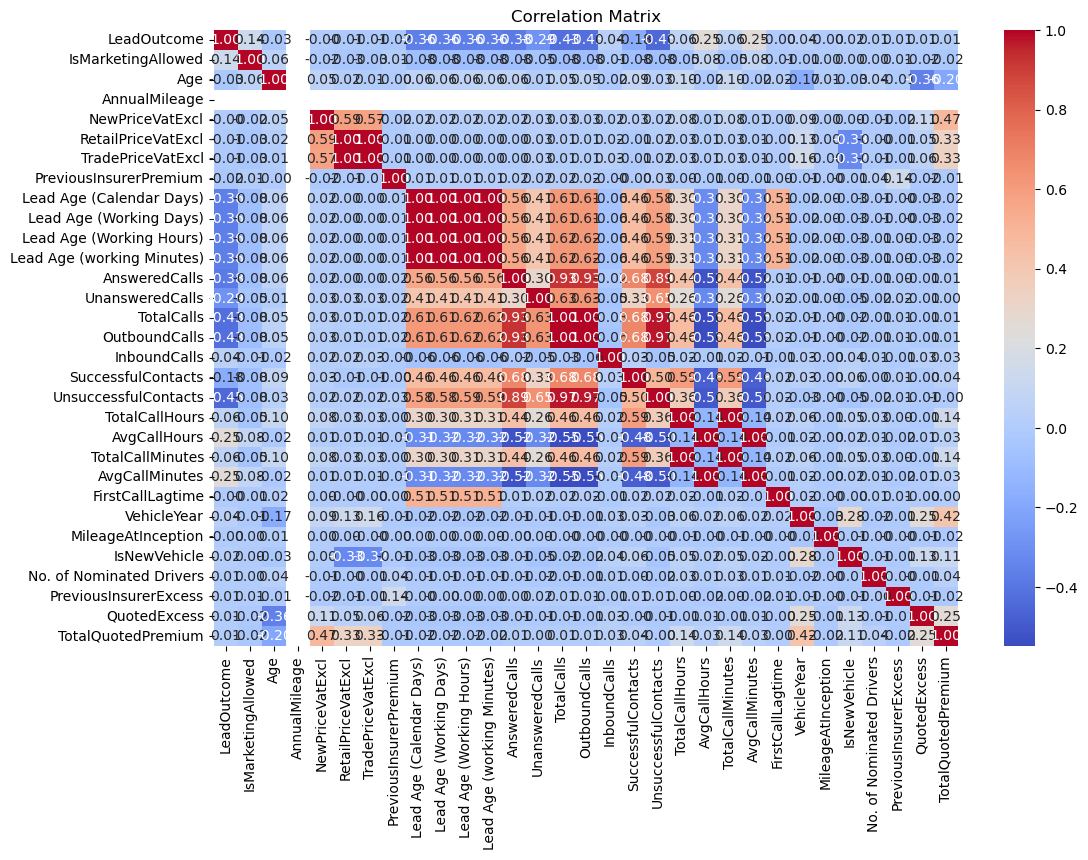

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Insights:

Metrics related to call frequency and lead age are crucial factors that could influence the lead outcome. On the other hand, factors like the individual's age and marketing permissions have minimal impact on outcomes. This could guide focus areas for improving lead conversions, such as optimizing call strategies or prioritizing fresher leads.

### Numerical Feature Distribution

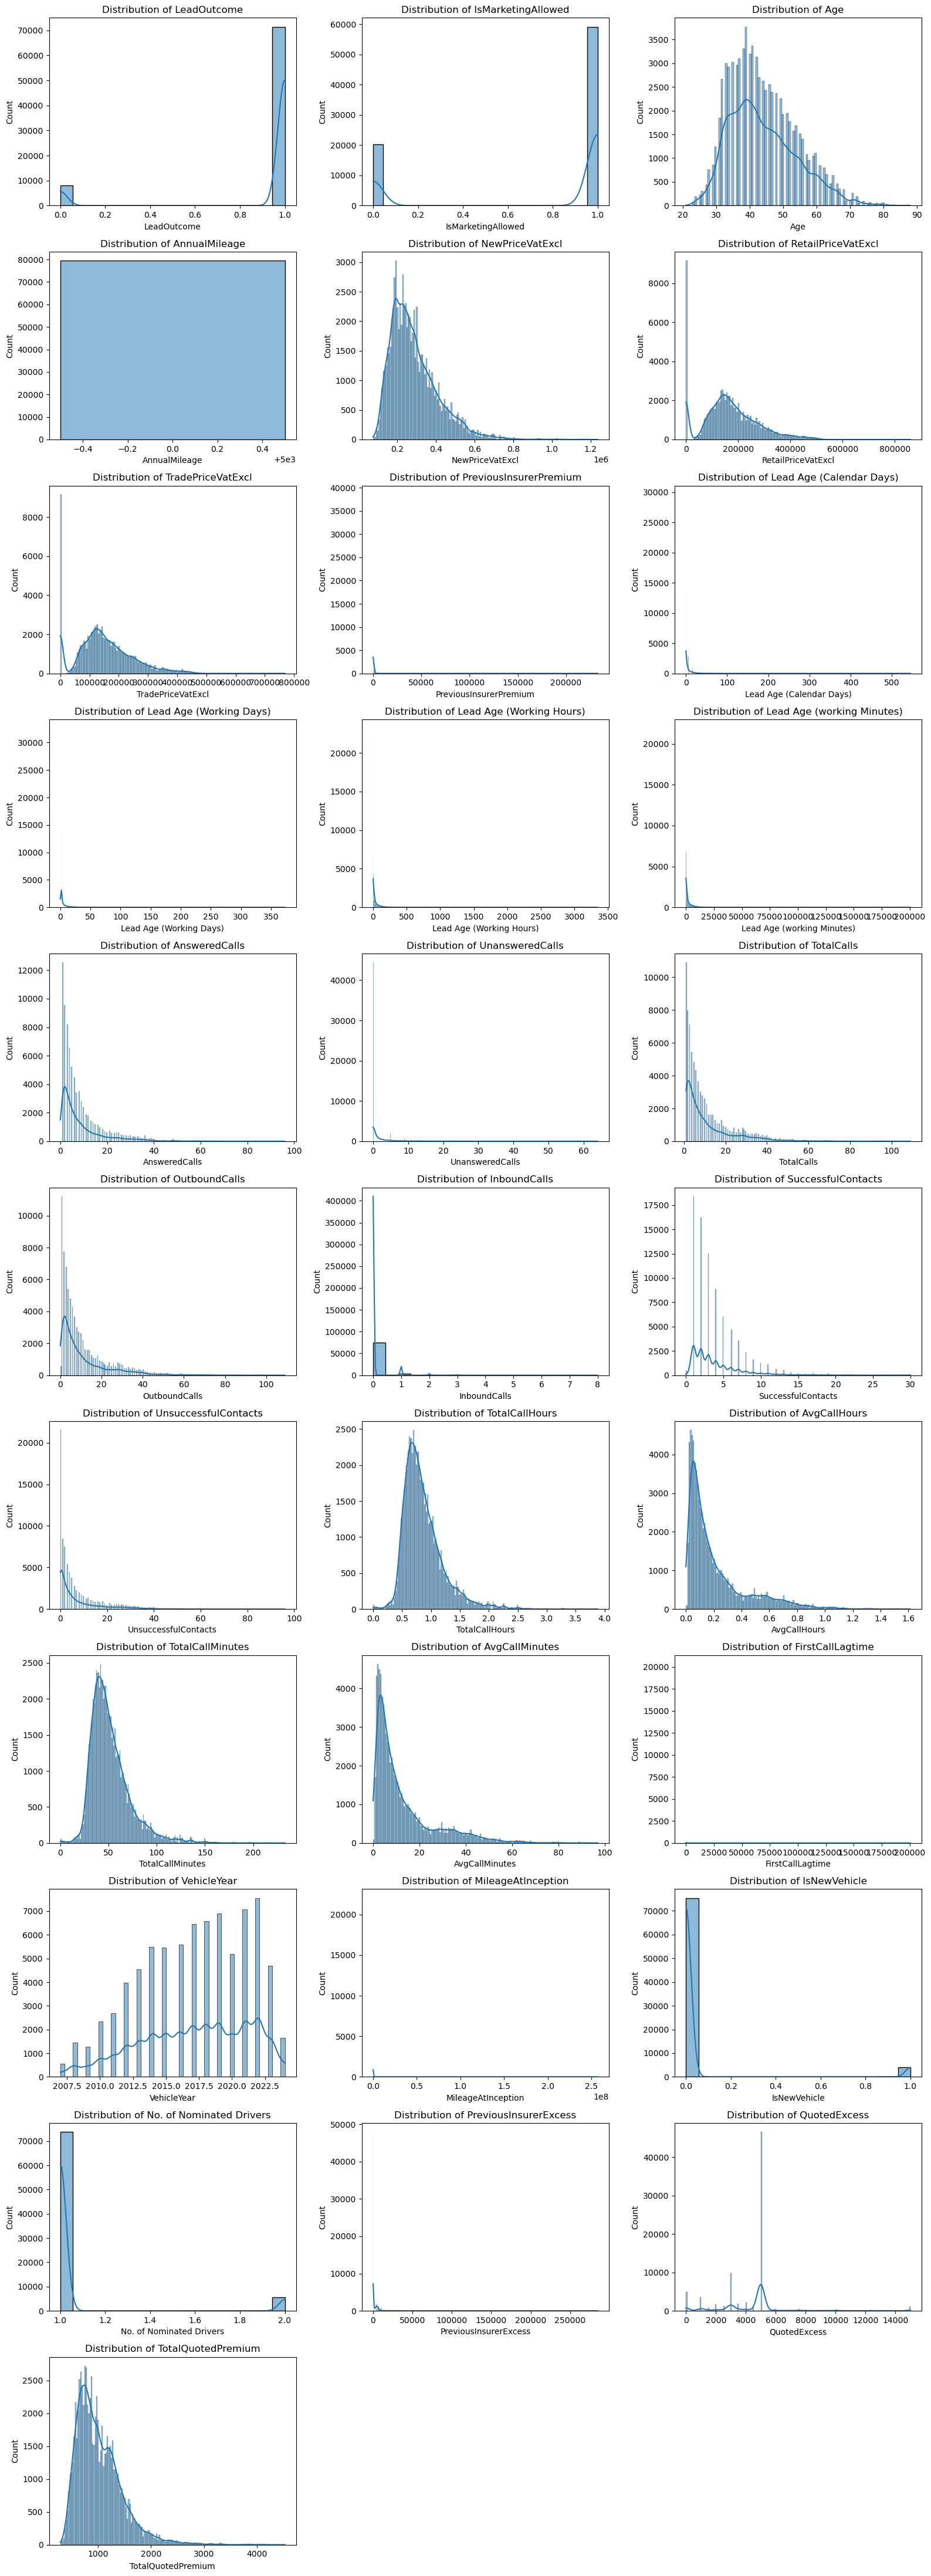

In [ ]:
# Plot distribution of numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Adjust the number of rows based on the number of features
n_features = len(numerical_features)
n_cols = 3
n_rows = (n_features // n_cols) + (n_features % n_cols > 0)  # Calculate rows needed

plt.figure(figsize=(16, 4 * n_rows))  # Adjust figure height based on rows
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


Insights:

- Skewed Distributions: Most numerical variables, especially those related to pricing, calls, and vehicle metrics, are right-skewed.

- Lead Segmentation: Variables such as age, lead age, and call attempts could help segment leads into different engagement groups, potentially improving conversion strategies.

- Premium Calculations: Factors like AnnualMileage, VehicleYear, and MileageAtInception may play roles in calculating premiums, especially given their varied distributions, which show high diversity in customer profiles.

### Categorical Feature Distribution

C:\Users\tevin\AppData\Local\Temp\ipykernel_15136\3469818214.py:13: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\tevin\AppData\Local\Temp\ipykernel_15136\3469818214.py:13: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
c:\Users\tevin\anaconda3\envs\Tevin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


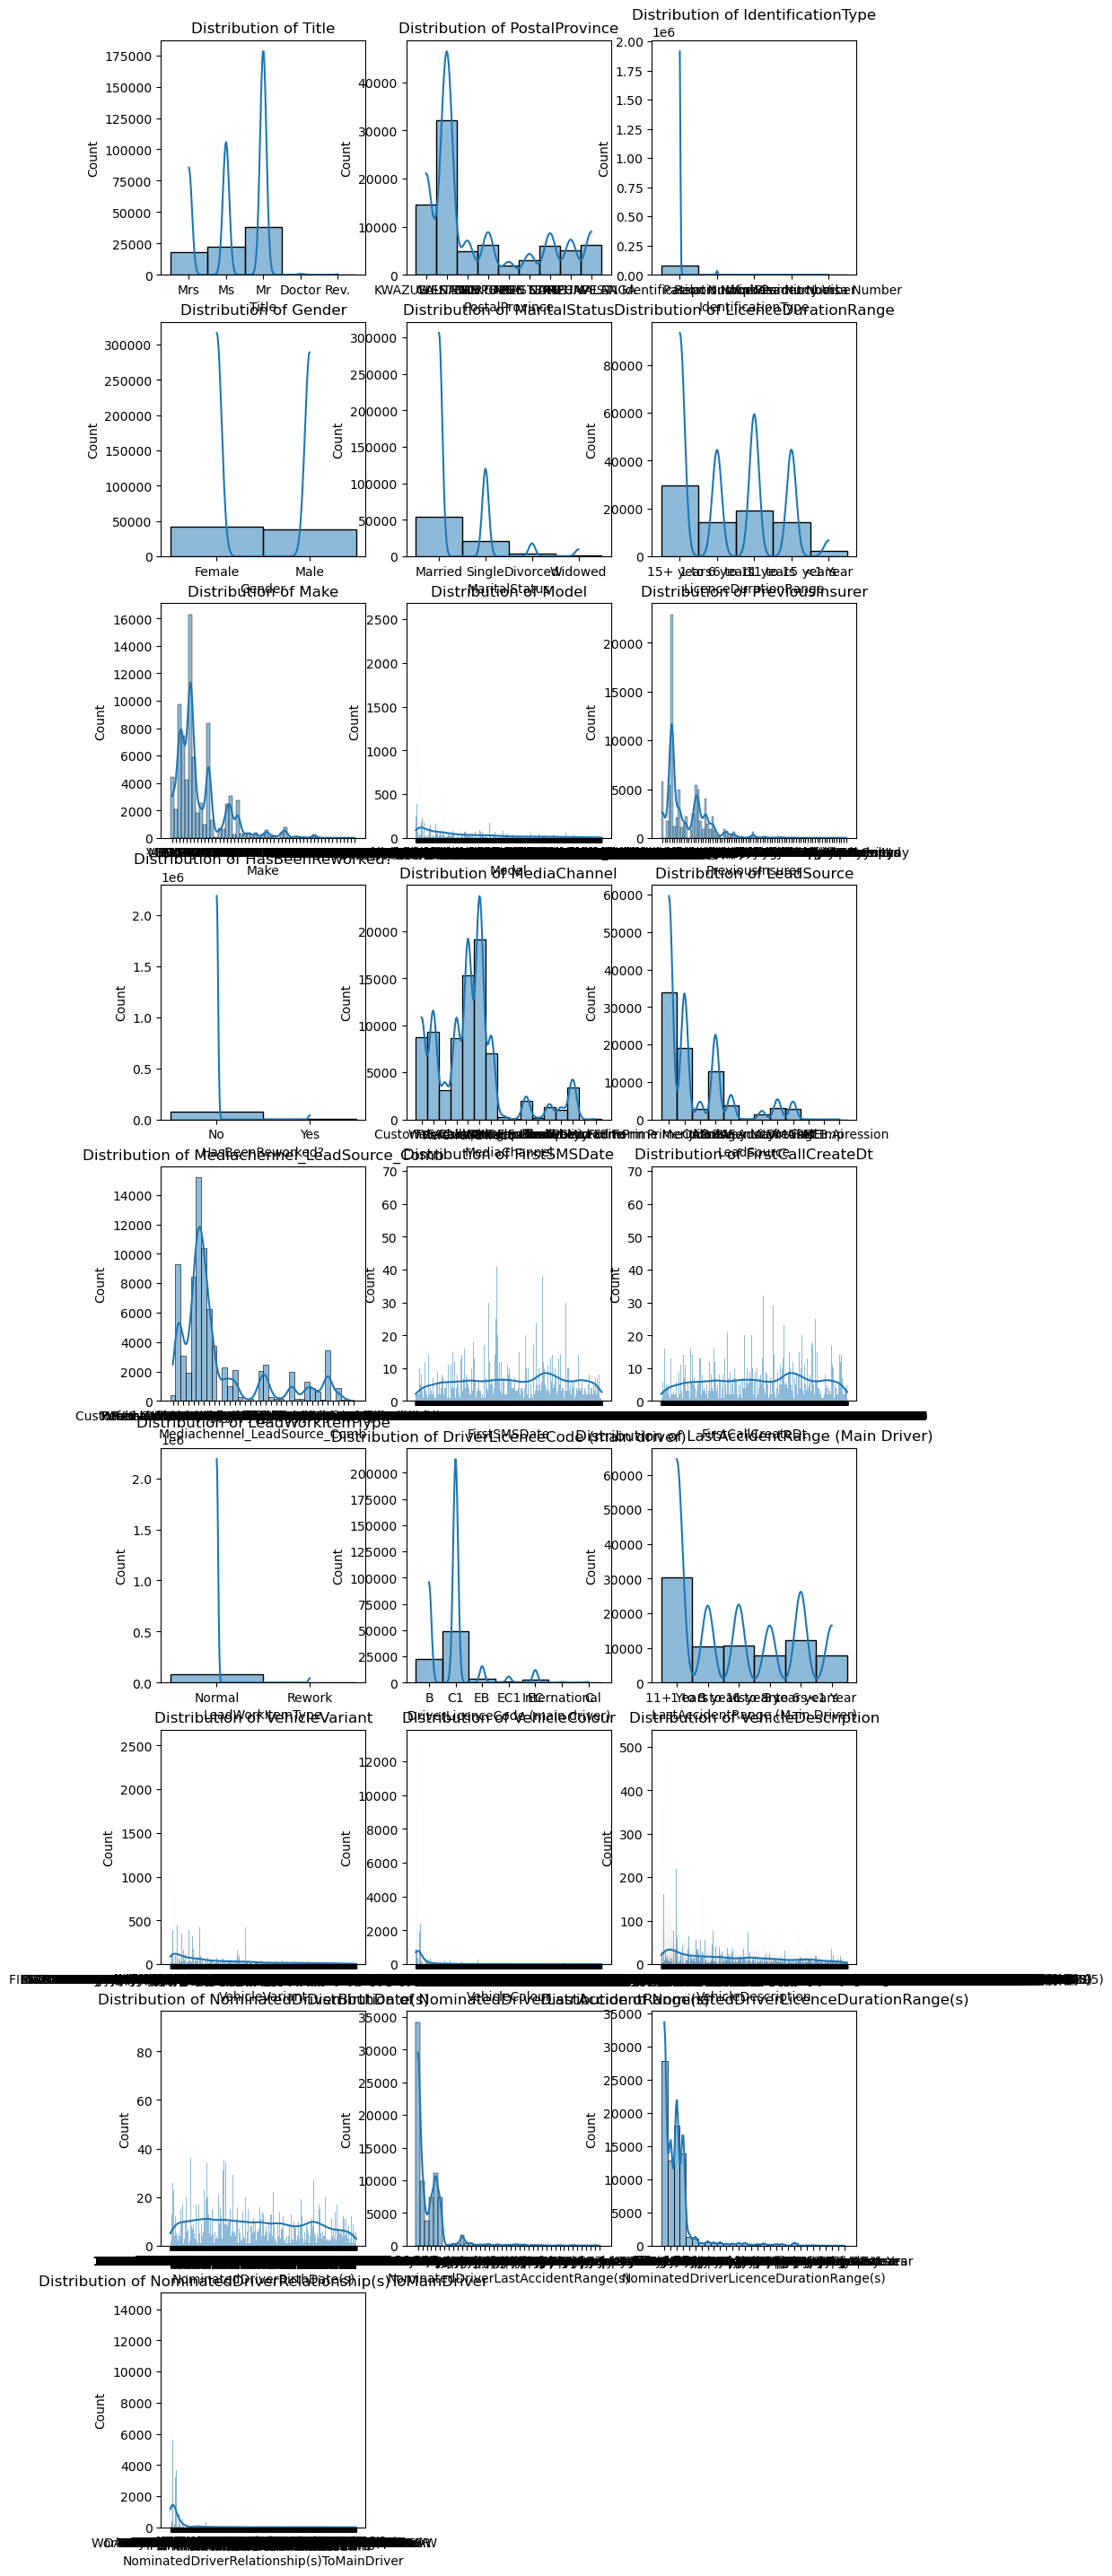

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Adjust the number of rows based on the number of features
n_features = len(categorical_columns)
n_cols = 3
n_rows = (n_features // n_cols) + (n_features % n_cols > 0)  # Calculate rows needed

plt.figure(figsize=(10, 4 * n_rows))  # Adjust figure height based on rows
for i, feature in enumerate(categorical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()



Insights:

- Market Segmentation: The skew in certain fields (e.g., PostalProvince, VehicleMake, MediaChannel) could be used for market segmentation, allowing for more targeted advertising.
- Risk and Premium Assessment: Variables like License Duration Range, VehicleModel, and Driver's License Code may help assess risk profiles, which could influence pricing and underwriting policies.
- Product Customization: Understanding demographic variables like MaritalStatus and Title can assist in tailoring products or offers to suit specific customer needs.
- Channel Effectiveness: MediaChannel and LeadSource distributions highlight the most successful lead generation methods, providing insights into effective marketing channels.

###  Feature Relationships with LeadOutcome

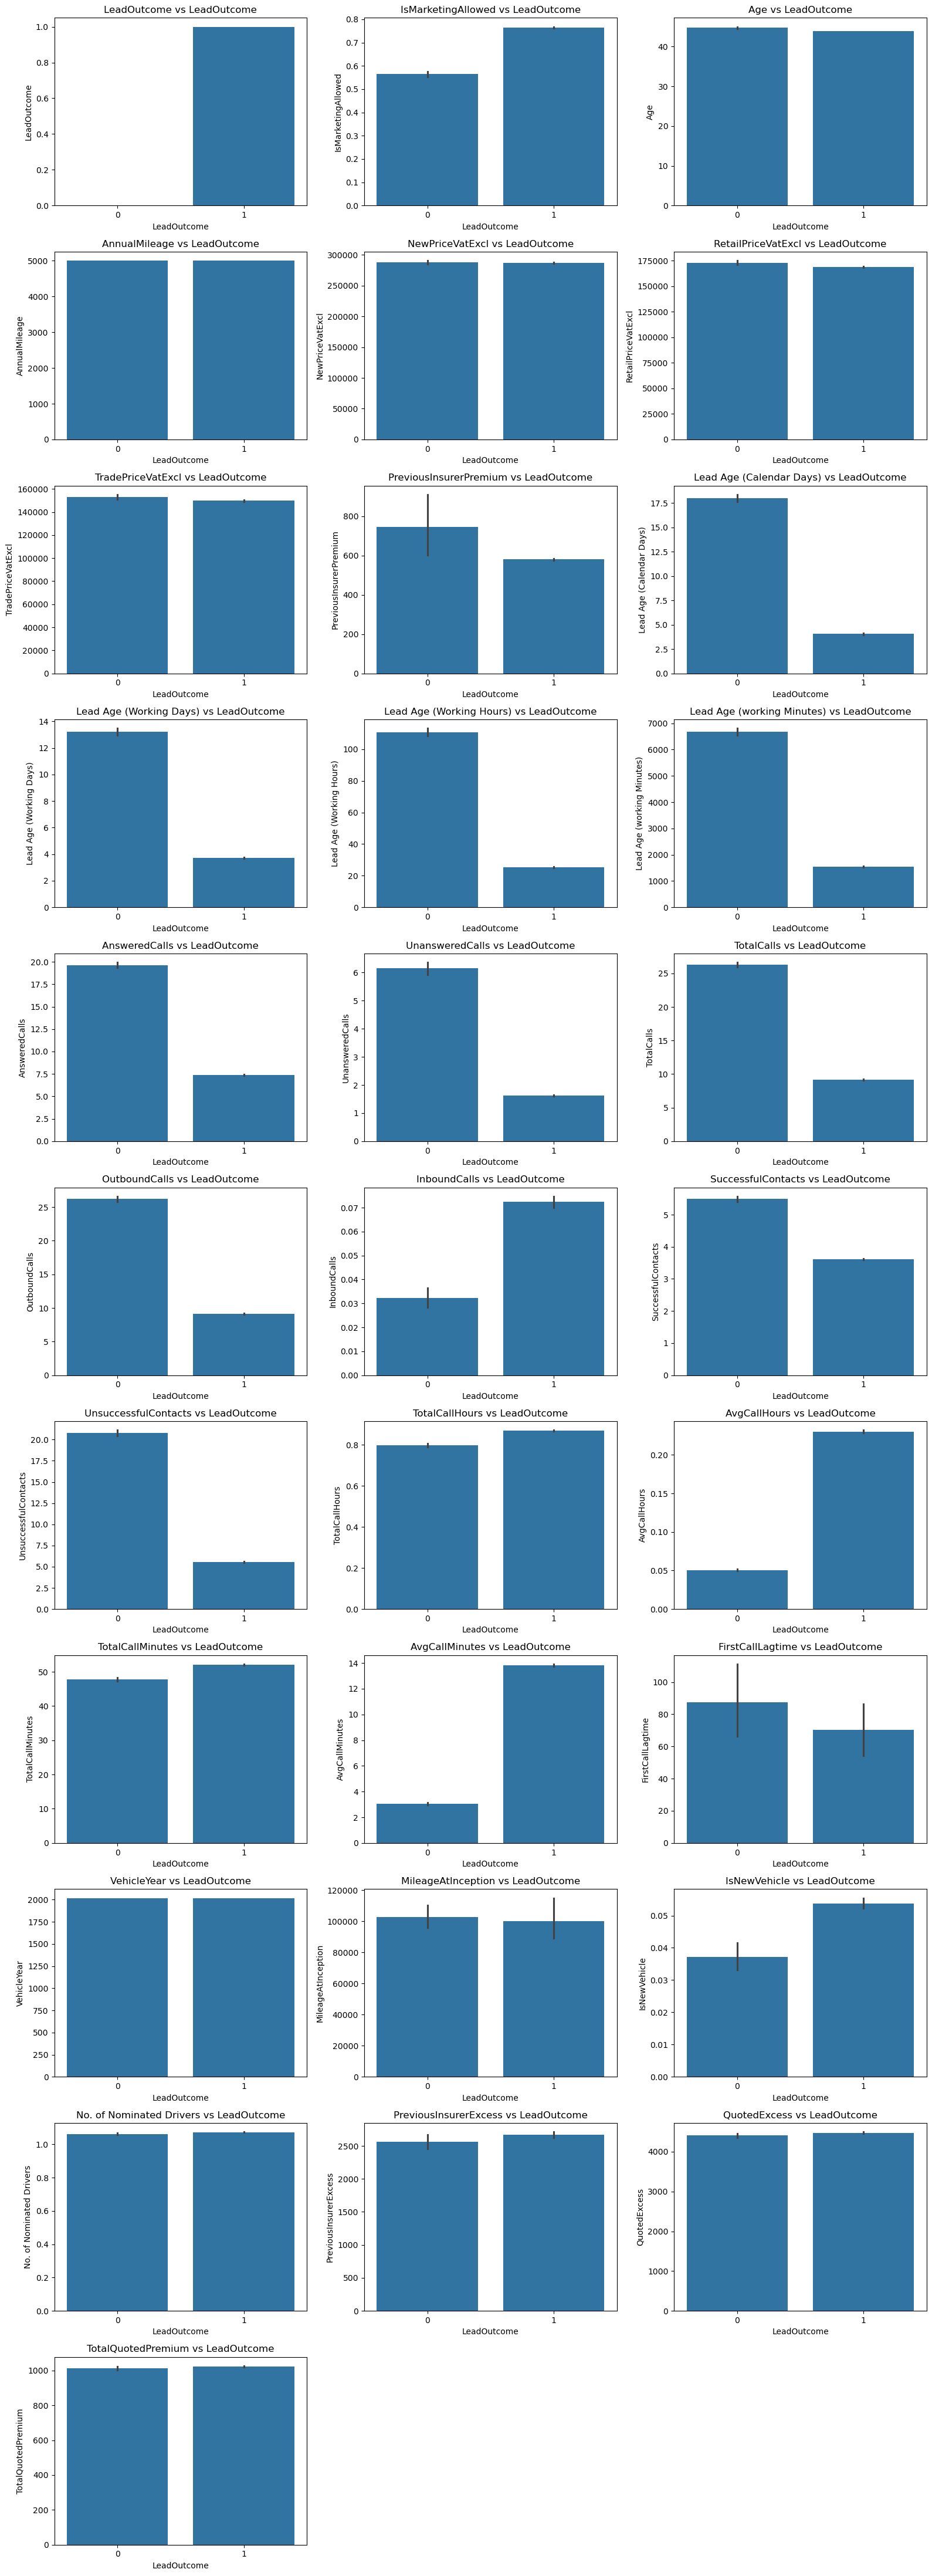

In [ ]:
# Adjust the number of rows based on the number of numerical features
n_features = len(numerical_features)
n_cols = 3
n_rows = (n_features // n_cols) + (n_features % n_cols > 0)  # Calculate the required number of rows

plt.figure(figsize=(16, 4 * n_rows))  # Adjust figure size based on the number of rows
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.barplot(x='LeadOutcome', y=feature, data=df)
    plt.title(f'{feature} vs LeadOutcome')
plt.tight_layout()
plt.show()


Insights:

- Prompt Engagement: Leads with a shorter lag time for the first call and lower overall lead age have higher conversion rates, reinforcing the importance of reaching out to leads quickly.

- Effective Call Management: Successful contacts and answered calls are more prevalent in converted leads. Focusing on call quality and ensuring successful contact is more impactful than merely increasing call attempts.

- Marketing Permissions: Converted leads have a slightly higher rate of allowing marketing, which suggests that leads open to marketing communications might be more receptive to conversion efforts.

Focusing on quick, successful initial engagement and optimizing call success rate can significantly improve lead conversion outcomes.

### Pairplot

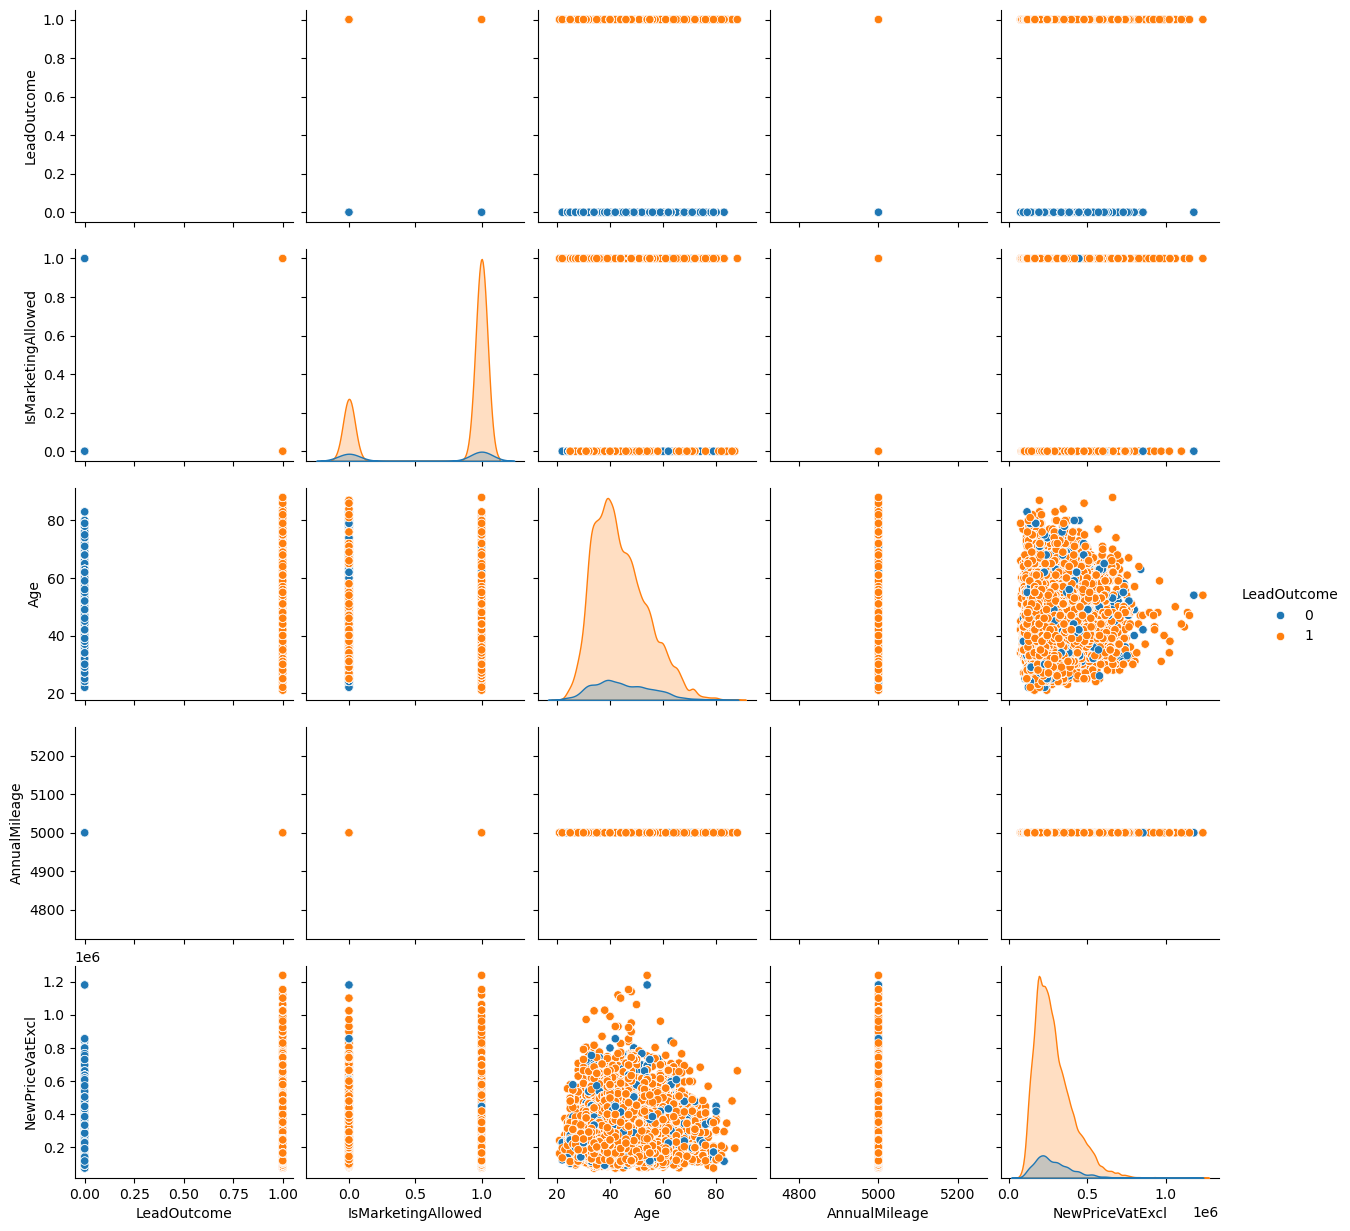

In [ ]:
# Pairplot of a few important numerical features
sns.pairplot(df, hue='LeadOutcome', diag_kind='kde', vars=numerical_features[:5])
plt.show()


Insight:

- Marketing Permissions and Age are two features that may impact lead conversion, with younger individuals and those who allow marketing showing higher conversion tendencies.

- AnnualMileage and NewPriceVatExcl do not appear to have strong influences on conversion outcomes.

Focusing on target demographics that are younger and more open to marketing could improve lead conversion strategies.

# <font color=black> 6. Model training</font> <a class="anchor" id="chapter7"></a>

### Train-test split (80% training, 20% testing)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest Model

In [ ]:
from sklearn.metrics import classification_report


with mlflow.start_run():
    mlflow.log_param("model_type", "RandomForest")

    # Fit the RandomForestClassifier
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test)

    # Log the model metrics to MLflow
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Log metrics to MLflow
    mlflow.log_metric("accuracy", accuracy)

    # Print the evaluation metrics
    print(f"Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

    # save the model to MLflow
    mlflow.sklearn.log_model(rf_model, "random_forest_model")

KeyboardInterrupt: 

### Gradient Boosting Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

with mlflow.start_run():
    mlflow.log_param("model_type", "Gradient Boosting")

    # Fit the Gradient Boosting model
    gb_model = GradientBoostingClassifier(random_state=42)
    gb_model.fit(X_train, y_train)

    # Make predictions
    y_pred = gb_model.predict(X_test)

    # Log the model metrics to MLflow
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Log metrics to MLflow
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_param("confusion_matrix", conf_matrix)
    mlflow.log_param("classification_report", class_report)

    # Print the evaluation metrics
    print(f"Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

    # save the model to MLflow
    mlflow.sklearn.log_model(gb_model, "gradient_boosting_model")


KeyboardInterrupt: 